# Intern: REPANA JYOTHI PRAKASH

# Task 1 : Stock Market Prediction

# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load/Fetch Dataset

In [3]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

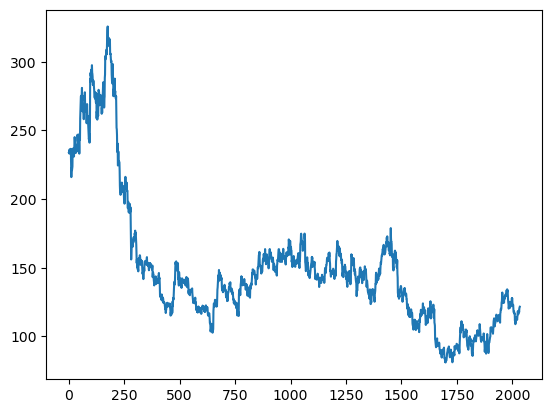

In [5]:
plt.plot(df1)

# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


# Splitting dataset into train and test data

In [7]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

print("Training Size is: ", training_size)
print("Test Size is: ", test_size)

Training Size is:  1322
Test Size is:  713


# Convert an array of values to dataset matrics

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Reshaping into X=t,t+1,t+2,t+3 and Y=t+4

In [9]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [10]:
print("Reshaped X_train: ", X_train.shape)
print("Reshaped y_train: ", y_train.shape)
print("Reshaped X_test: ", X_test.shape)
print("Reshaped y_test: ", y_test.shape)

Reshaped X_train:  (1221, 100)
Reshaped y_train:  (1221,)
Reshaped X_test:  (612, 100)
Reshaped y_test:  (612,)


# Reshape input to be [samples, time steps, features] which is required for LSTM

In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,
          y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 230ms/step - loss: 0.0265 - val_loss: 0.0060
Epoch 2/100
20/20 [==============================] - 3s 155ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 3/100
20/20 [==============================] - 3s 165ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 3s 155ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 3s 176ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 4s 218ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 4s 202ms/step - loss: 0.0016 - val_loss: 9.7874e-04
Epoch 9/100
20/20 [==============================] - 4s 220ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0013 - v

20/20 [==============================] - 4s 201ms/step - loss: 3.0177e-04 - val_loss: 4.5739e-04
Epoch 77/100
20/20 [==============================] - 4s 191ms/step - loss: 3.0624e-04 - val_loss: 3.3214e-04
Epoch 78/100
20/20 [==============================] - 4s 187ms/step - loss: 3.2883e-04 - val_loss: 3.0290e-04
Epoch 79/100
20/20 [==============================] - 4s 186ms/step - loss: 3.0642e-04 - val_loss: 2.3644e-04
Epoch 80/100
20/20 [==============================] - 4s 188ms/step - loss: 3.3919e-04 - val_loss: 2.5767e-04
Epoch 81/100
20/20 [==============================] - 4s 182ms/step - loss: 2.7916e-04 - val_loss: 3.2787e-04
Epoch 82/100
20/20 [==============================] - 4s 192ms/step - loss: 3.5386e-04 - val_loss: 2.5631e-04
Epoch 83/100
20/20 [==============================] - 4s 194ms/step - loss: 2.7275e-04 - val_loss: 5.2150e-04
Epoch 84/100
20/20 [==============================] - 4s 185ms/step - loss: 2.9117e-04 - val_loss: 2.3857e-04
Epoch 85/100
20/20 [===

# Model prediction and performance metrics

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 25ms/step


# Back to original form (matrics to values)

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate root mean square error (RMSE) performance metrics

In [17]:
import math
from sklearn.metrics import mean_squared_error
print("RMSE value for training data is: ",math.sqrt(mean_squared_error(y_train,train_predict)))
print("RMSE value for testing data is: ",math.sqrt(mean_squared_error(y_test,test_predict)))

RMSE value for training data is:  166.49949898488418
RMSE value for testing data is:  116.5790457960041


# Visualize train and test pattern

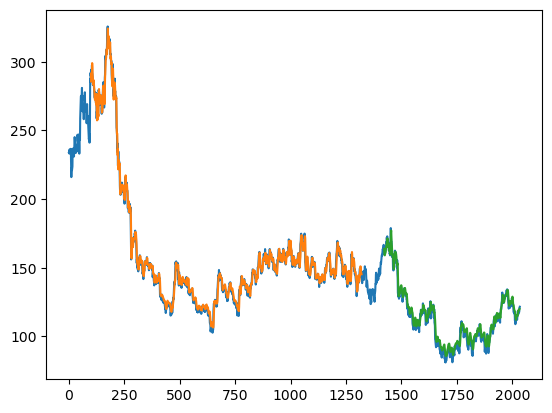

In [18]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
len(test_data)

713

In [20]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

# Temporary input

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [22]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

# Demonstrate prediction for next 10 days

In [24]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.16809478 0.17125416
 0.173814   0.1760551  0.1781258  0.18008706 0.18196496 0.18377578
 0.1855329  0.18724704 0.1889258  0.19057393 0.19219398 0.19378713
 0.19535387 0.19689447 0.19840947 0.19989946 0.201

8 day output [[0.22691923]]
9 day input [0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444
 0.16584967 0.16809478 0.17125416 0.173814   0.1760551  0.1781258
 0.18008706 0.18196496 0.18377578 0.1855329  0.18724704 0.1889258
 0.19057393 0.19219398 0.19378713 0.19535387 0.19689447 0.19840947
 0.19989946 0.20136529 0.20280802 0.204229   0.20562938 0.20701036
 0.20837298 0.20971826 0.2

16 day output [[0.23544228]]
17 day input [0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16809478
 0.17125416 0.173814   0.1760551  0.1781258  0.18008706 0.18196496
 0.18377578 0.1855329  0.18724704 0.1889258  0.19057393 0.19219398
 0.19378713 0.19535387 0.19689447 0.19840947 0.19989946 0.20136529
 0.20280802 0.204229   0.20562938 0.20701036 0.20837298 0.20971826
 0.21104681 0.21235931 0.2136561  0.21493745 0.2162036  0.21745452
 0.21869037 0.219911

25 day output [[0.24399954]]
26 day input [0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.16584967 0.16809478 0.17125416 0.173814   0.1760551
 0.1781258  0.18008706 0.18196496 0.18377578 0.1855329  0.18724704
 0.1889258  0.19057393 0.19219398 0.19378713 0.19535387 0.19689447
 0.19840947 0.19989946 0.20136529 0.20280802 0.204229   0.20562938
 0.20701036 0.20837298 0.20971826 0.21104681 0.21235931 0.2136561
 0.21493745 0.2162036  0.21745452 0.21869037 0.21991113 0.22111672
 0.22230732 0.22348282 0.22464323 0.22578868 0.22691923 0.22803503
 0.22913614 0.23022267 

In [25]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [26]:
len(df1)

2035

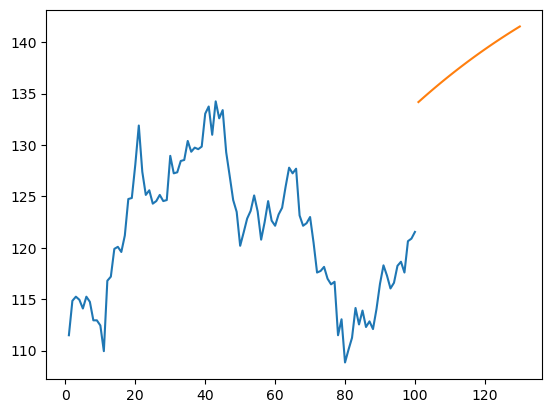

In [27]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

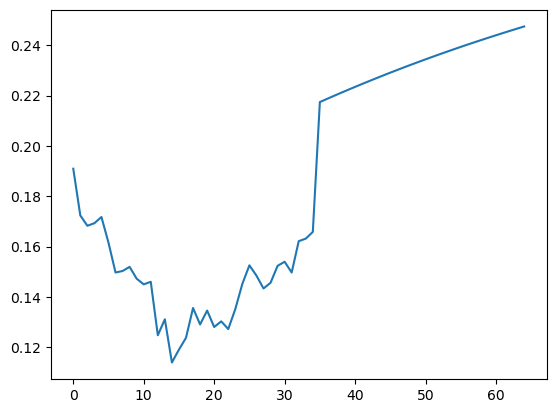

In [28]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [29]:
df3=scaler.inverse_transform(df3).tolist()

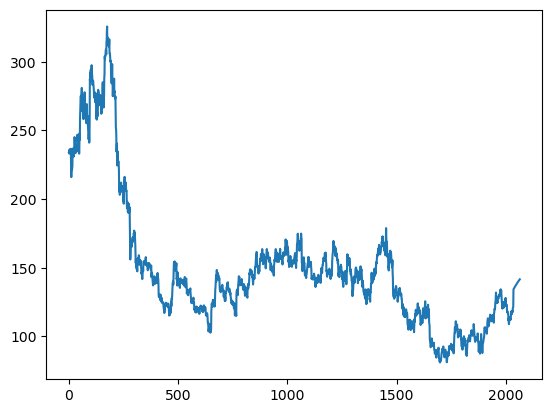

In [30]:
plt.plot(df3)